In [3]:
# Get Data ==============
from pycaret.datasets import get_data
dataset = get_data('credit')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [4]:
# Sample 5% of data to be used as unseen data ============
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)

# print the revised shape ============
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (22800, 24)
Unseen Data For Predictions: (1200, 24)


In [5]:
from pycaret.classification import *
s = setup(data = data, target = 'default', session_id=123)

,Description,Value
0,session_id,123
1,Target,default
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(22800, 24)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


In [6]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8254,0.0000,0.3637,0.6913,0.4764,0.3836,0.4122,0.0300
lda,Linear Discriminant Analysis,0.8247,0.7634,0.3755,0.6794,0.4835,0.3884,0.4132,0.1490
gbc,Gradient Boosting Classifier,0.8226,0.7789,0.3551,0.6806,0.4664,0.3725,0.4010,1.9880
ada,Ada Boost Classifier,0.8221,0.7697,0.3505,0.6811,0.4626,0.3690,0.3983,0.4700
catboost,CatBoost Classifier,0.8216,0.7768,0.3637,0.6694,0.4711,0.3750,0.4004,2.8820
lightgbm,Light Gradient Boosting Machine,0.8210,0.7750,0.3609,0.6679,0.4683,0.3721,0.3977,0.7390
rf,Random Forest Classifier,0.8199,0.7598,0.3663,0.6601,0.4707,0.3727,0.3965,0.9710
xgboost,Extreme Gradient Boosting,0.8160,0.7561,0.3629,0.6391,0.4626,0.3617,0.3829,3.3190
et,Extra Trees Classifier,0.8092,0.7377,0.3677,0.6047,0.4571,0.3497,0.3657,0.7460
lr,Logistic Regression,0.7814,0.6410,0.0003,0.1000,0.0006,0.0003,0.0034,0.9370


In [7]:
print(best_model)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)


In [8]:
rdg_mdl = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8195,0.0000,0.3553,0.6631,0.4627,0.3659,0.3917
1,0.8327,0.0000,0.3897,0.7158,0.5046,0.4144,0.4421
2,0.8239,0.0000,0.3381,0.7024,0.4565,0.3664,0.4014
3,0.8277,0.0000,0.3639,0.7056,0.4802,0.3893,0.4200
4,0.8208,0.0000,0.3582,0.6684,0.4664,0.3703,0.3964
5,0.8340,0.0000,0.3954,0.7188,0.5102,0.4202,0.4474
6,0.8239,0.0000,0.3668,0.6809,0.4767,0.3821,0.4086
7,0.8239,0.0000,0.3381,0.7024,0.4565,0.3664,0.4014
8,0.8214,0.0000,0.3553,0.6739,0.4653,0.3702,0.3976
9,0.8257,0.0000,0.3764,0.6823,0.4852,0.3906,0.4157


In [9]:
print(rdg_mdl)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)


In [10]:
# tune model
rdg_mdl_tune = tune_model(rdg_mdl)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8195,0.0000,0.3553,0.6631,0.4627,0.3659,0.3917
1,0.8321,0.0000,0.3897,0.7120,0.5037,0.4129,0.4401
2,0.8233,0.0000,0.3381,0.6982,0.4556,0.3650,0.3993
3,0.8277,0.0000,0.3639,0.7056,0.4802,0.3893,0.4200
4,0.8208,0.0000,0.3553,0.6703,0.4644,0.3688,0.3956
5,0.8346,0.0000,0.3983,0.7202,0.5129,0.4231,0.4500
6,0.8239,0.0000,0.3696,0.6789,0.4787,0.3836,0.4093
7,0.8246,0.0000,0.3381,0.7066,0.4574,0.3679,0.4035
8,0.8214,0.0000,0.3553,0.6739,0.4653,0.3702,0.3976
9,0.8257,0.0000,0.3764,0.6823,0.4852,0.3906,0.4157


In [11]:
print(rdg_mdl_tune)

RidgeClassifier(alpha=2.81, class_weight=None, copy_X=True, fit_intercept=False,
                max_iter=None, normalize=True, random_state=123, solver='auto',
                tol=0.001)


In [12]:
#create and tune models
dt_mdl = create_model('dt')
dt_mdl_tune = tune_model(dt_mdl)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8177,0.7475,0.3095,0.6835,0.4260,0.3355,0.3728
1,0.8289,0.7711,0.3381,0.7375,0.4637,0.3782,0.4190
2,0.8208,0.7377,0.2894,0.7266,0.4139,0.3305,0.3796
3,0.8252,0.7580,0.3152,0.7333,0.4409,0.3563,0.4010
4,0.8195,0.7545,0.3095,0.6968,0.4286,0.3398,0.3794
5,0.8271,0.7509,0.3438,0.7186,0.4651,0.3769,0.4134
6,0.8195,0.7488,0.3123,0.6943,0.4308,0.3415,0.3801
7,0.8246,0.7529,0.2980,0.7482,0.4262,0.3446,0.3957
8,0.8195,0.7241,0.3123,0.6943,0.4308,0.3415,0.3801
9,0.8188,0.7378,0.3075,0.6903,0.4254,0.3362,0.3751


In [26]:
evaluate_model(dt_mdl_tune)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

IntProgress(value=0, description='Processing: ', max=5)

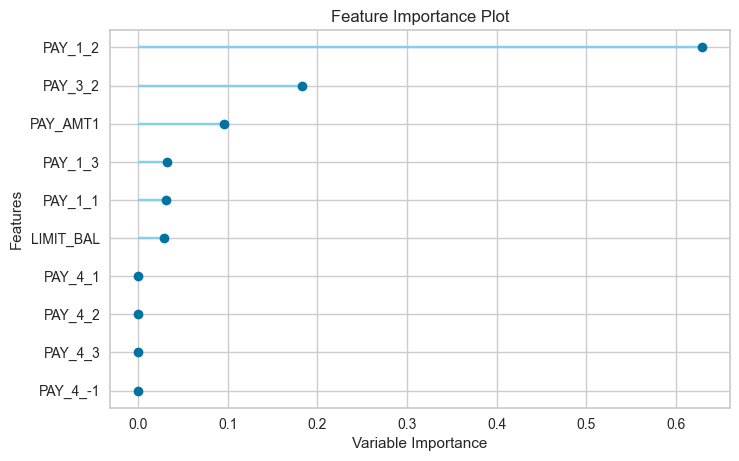

In [14]:
plot_model(dt_mdl_tune, plot='feature')

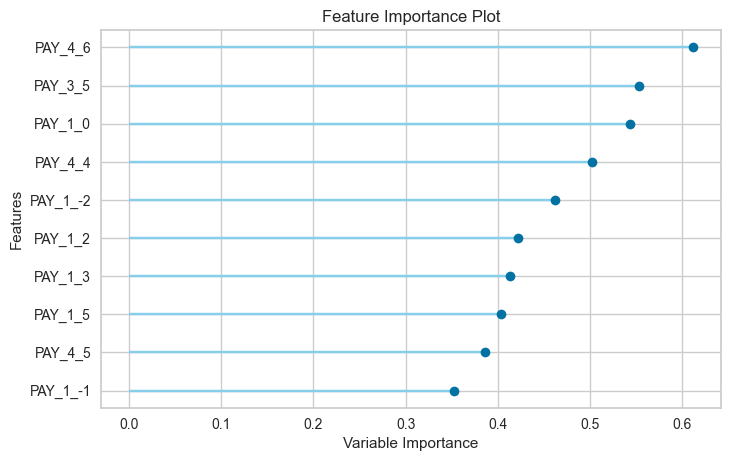

In [15]:
plot_model(rdg_mdl_tune, plot='feature')

In [16]:
predict_model(rdg_mdl_tune);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.8146,0.6465,0.3385,0.6867,0.4534,0.3570,0.3894


In [17]:
predict_model(dt_mdl_tune);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.8113,0.7340,0.2928,0.7032,0.4134,0.3230,0.3672


In [18]:
final_rdg = finalize_model(rdg_mdl_tune);
print(final_rdg)

RidgeClassifier(alpha=2.81, class_weight=None, copy_X=True, fit_intercept=False,
                max_iter=None, normalize=True, random_state=123, solver='auto',
                tol=0.001)


In [19]:
rdg_unseen_predictions = predict_model(final_rdg)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.8151,0.6475,0.3404,0.6879,0.4554,0.3590,0.3913


In [20]:
# check metric on unseen data
from pycaret.utils import check_metric
check_metric(rdg_unseen_predictions['default'], rdg_unseen_predictions['Label'], metric = 'Accuracy')

0.8151

In [21]:
save_model(final_rdg,'final_reg_112521')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='default',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                 ('fix_perfect', Remove_100(target='default')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
        

In [22]:
final_dt = finalize_model(dt_mdl_tune);
print(final_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [23]:
dt_unseen_predictions = predict_model(final_dt)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.8139,0.7456,0.3140,0.7022,0.4340,0.3415,0.3812


In [24]:
# check metric on unseen data
from pycaret.utils import check_metric
check_metric(dt_unseen_predictions['default'], dt_unseen_predictions['Label'], metric = 'Accuracy')

0.8139

In [25]:
save_model(final_dt,'final_dt_112521')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='default',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                         criterion='entropy', max_depth=6,
                        